# Importing Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import GridSearchCV
import sys

In [3]:
sys.path.append('D:\Machine Learning\Ironhack\GitHub\IronEnrique')

In [4]:
from Modules.Transforms import my_transformations
from Modules.Performance import perf_classification
from Modules.Predict import classification
from Modules.Predict import model_comparison

# Functions

In [5]:
# Function to store in dictionary the number of nan values per column

def nan_counter(df):
    
    """
    Returns a dictionary containing the number of nan values per column (for dataframe df)

    Parameters
    ----------
    df : Pandas dataframe

    Returns
    -------
    remaining_nan : Dictionary
        Contains the number of nan values in each column of the dataframe

    """
    
    remaining_nan = {}

    for column in df.columns:

        remaining_nan[column] = df[column][df[column].isna() == True].size

    return remaining_nan

# Loading the data

In [6]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

# Checking the Data

In [7]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [8]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [9]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors="coerce")

In [10]:
churnData = pd.concat([churnData._get_numeric_data(), churnData.select_dtypes("object").astype("category")], axis=1)

In [11]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7043 non-null   int64   
 1   tenure            7043 non-null   int64   
 2   MonthlyCharges    7043 non-null   float64 
 3   TotalCharges      7032 non-null   float64 
 4   gender            7043 non-null   category
 5   Partner           7043 non-null   category
 6   Dependents        7043 non-null   category
 7   PhoneService      7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  Churn             7043 non-null   category
dtypes: category(12), float64

In [12]:
nan_counter(churnData)

{'SeniorCitizen': 0,
 'tenure': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'gender': 0,
 'Partner': 0,
 'Dependents': 0,
 'PhoneService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'Churn': 0}

In [13]:
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(np.mean(churnData["TotalCharges"]))

In [14]:
nan_counter(churnData)

{'SeniorCitizen': 0,
 'tenure': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 0,
 'gender': 0,
 'Partner': 0,
 'Dependents': 0,
 'PhoneService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'Churn': 0}

# Features Selection

## All variables

In [15]:
y = churnData["Churn"]
x = churnData.drop("Churn", axis=1)

In [16]:
ord_dict = {"gender": ["Female", "Male"], "Partner": ["No", "Yes"], "Dependents": ["No", "Yes"], "PhoneService": ["No", "Yes"]
            , "Contract": ["Month-to-month", "One year", "Two year"]
            }

nom_list = ["TechSupport", "StreamingTV", "StreamingMovies", "DeviceProtection", "OnlineBackup", "OnlineSecurity"] 

In [17]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True, ordinal_dict=ord_dict, nominal_list=nom_list)
train = transformed["train"]
test = transformed["test"]

C:\Users\ehern\miniconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\ehern\miniconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
train = transformed["train"]
test = transformed["test"]

In [19]:
x_allvars_train = pd.concat([train[0], train[1], train[2]], axis=1)
y_allvars_train = train[3]
x_allvars_test = pd.concat([test[0], test[1], test[2]], axis=1)
y_allvars_test = test[3]

-----------------
The model score using K-fold cross validation (k=10) is 0.789 with a standard deviation of 0.005
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=10),0.789135,-
val_std (k=10),0.004839,-
accuracy,0.798012,0.771469
precision,0.668837,0.584559
recall,0.479014,0.432065


-----------------
Confusion matrix for the train set
-----------------


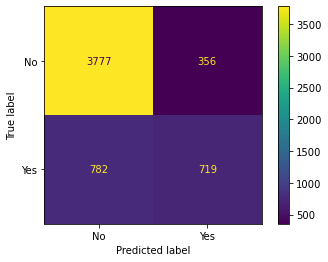

Confusion matrix for the test set
-----------------


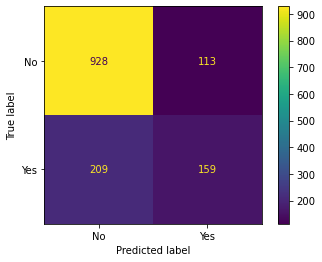

In [20]:
output_allvars = classification(x_allvars_train, y_allvars_train, x_allvars_test, y_allvars_test, DecisionTreeClassifier(max_depth=5), cv=10, pos_label="Yes", verbose=True, plot=True)

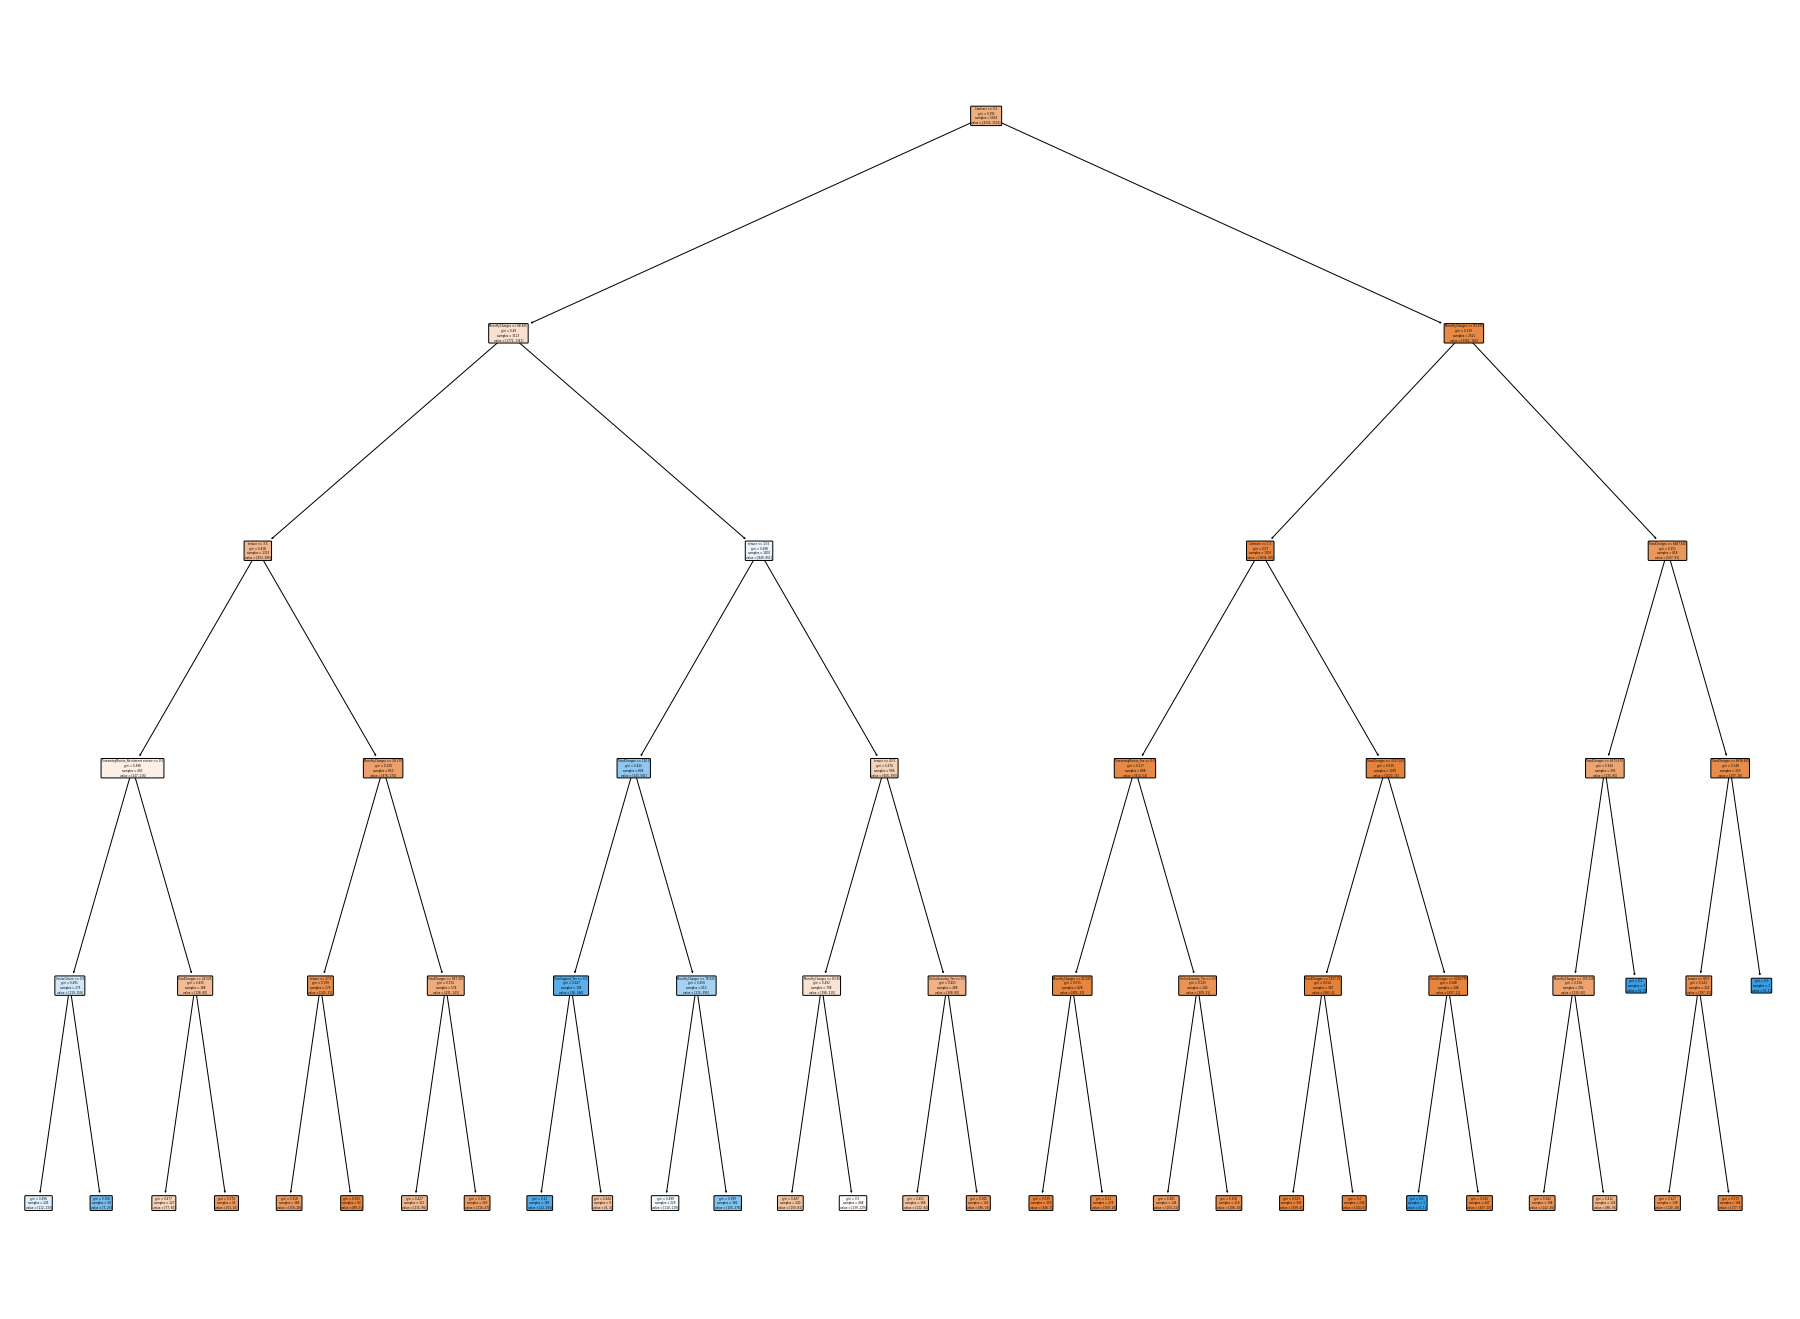

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(32,24))

plot_tree(output_allvars["model"], filled = True, rounded=True, feature_names=x_allvars_train.columns)
plt.show() 

## Reduced Number of featues - Contract, MonthlyCharges, TotalCharges and Tenure

In [22]:
y = churnData["Churn"]
x = churnData[["tenure", "Contract", "MonthlyCharges", "TotalCharges"]]

In [23]:
ord_dict = {"Contract": ["Month-to-month", "One year", "Two year"]}

In [24]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True, ordinal_dict=ord_dict)
train = transformed["train"]
test = transformed["test"]

C:\Users\ehern\miniconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\ehern\miniconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

-----------------
The model score using K-fold cross validation (k=10) is 0.788 with a standard deviation of 0.007
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=10),0.787715,-
val_std (k=10),0.006775,-
accuracy,0.798367,0.76863
precision,0.672332,0.577778
recall,0.474350,0.423913


-----------------
Confusion matrix for the train set
-----------------


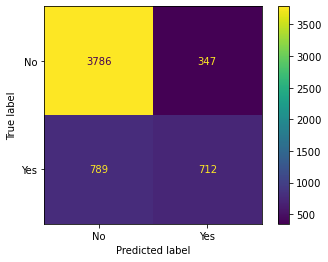

Confusion matrix for the test set
-----------------


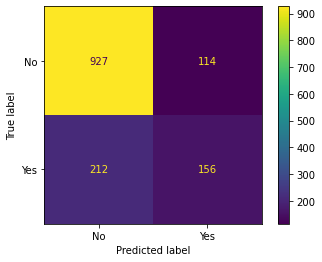

In [26]:
output_reduced = classification(x_train, y_train, x_test, y_test, DecisionTreeClassifier(max_depth=5), cv=10, pos_label="Yes", verbose=True, plot=True)

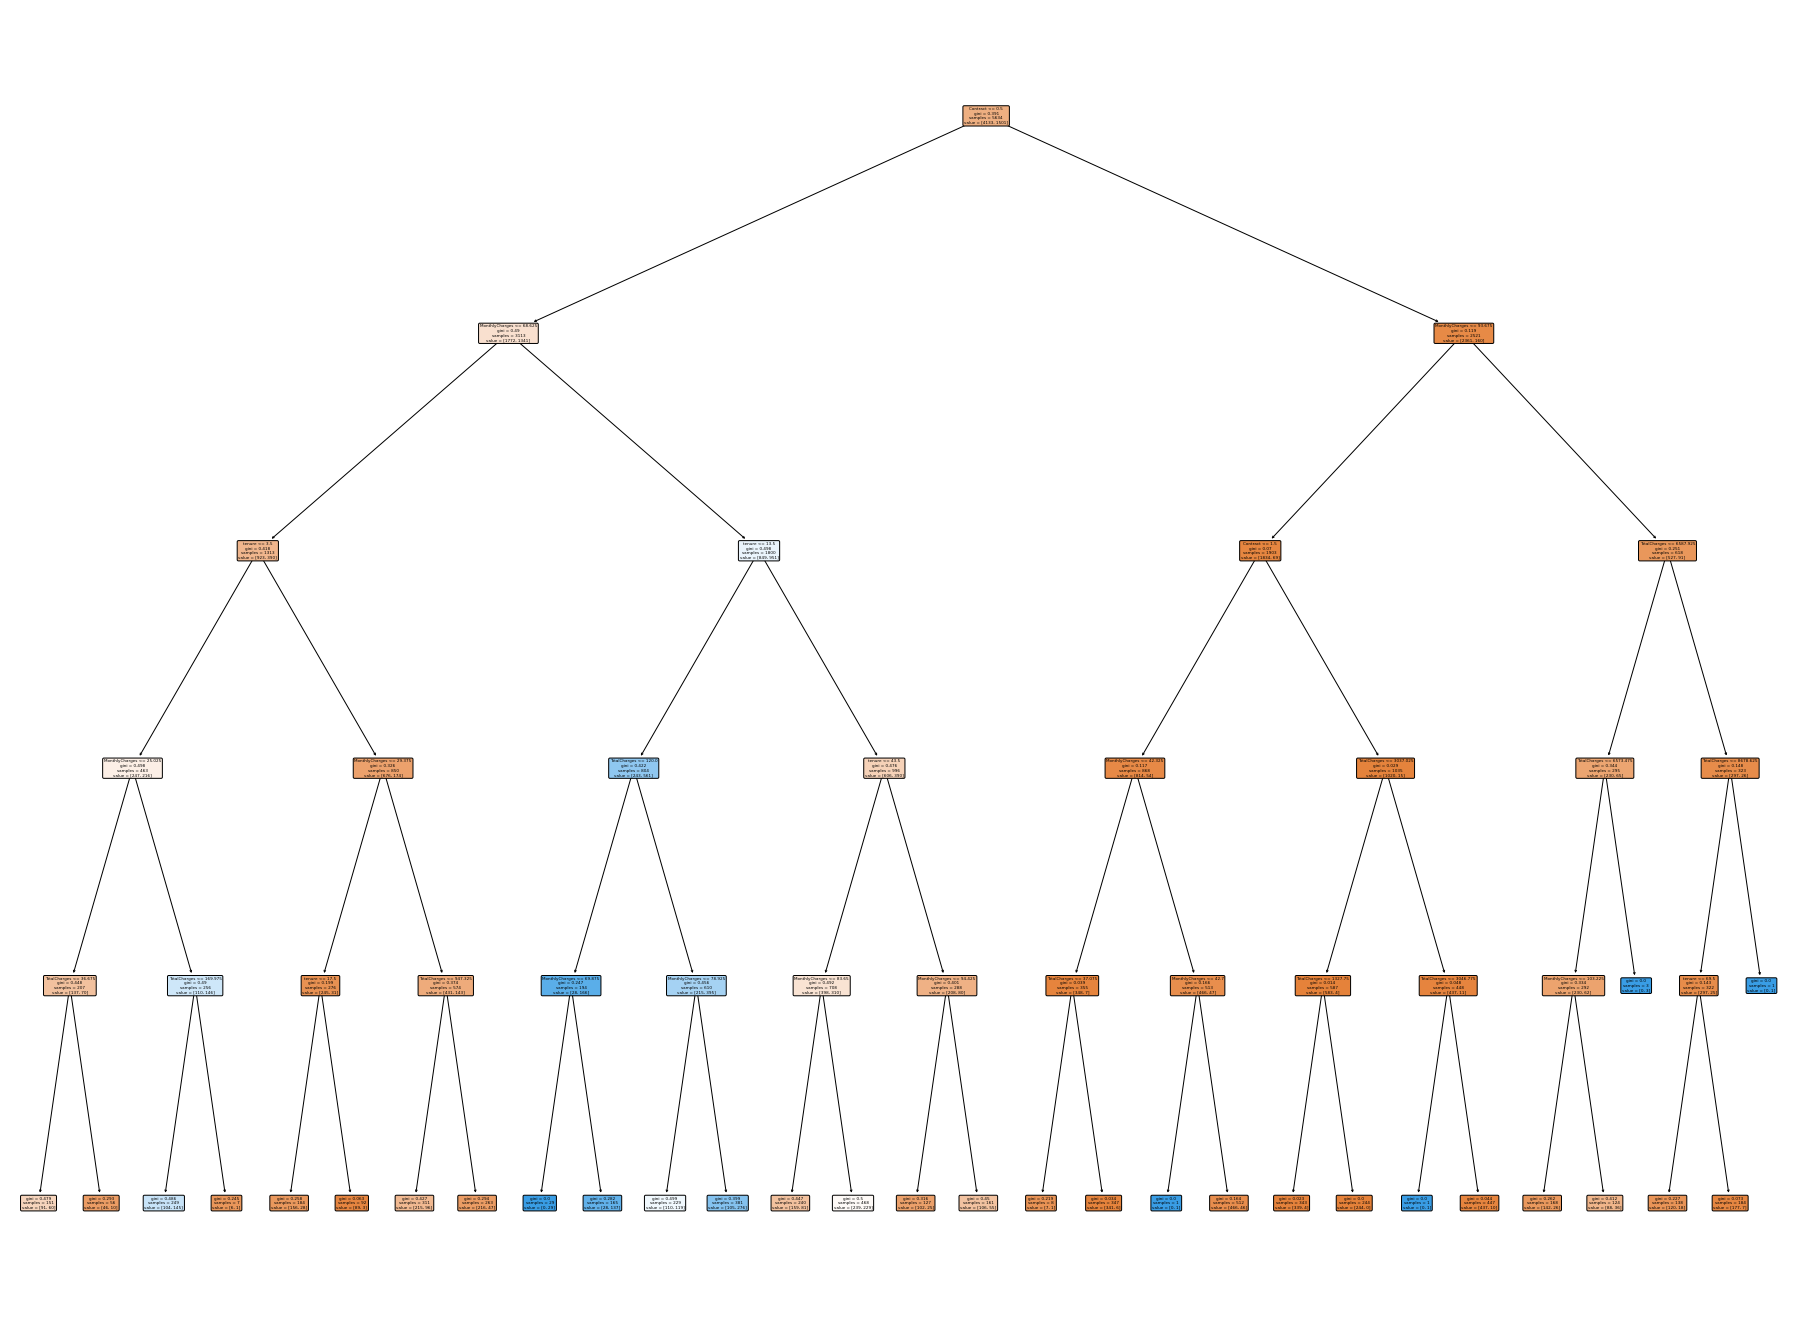

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (32,24))

plot_tree(output_reduced["model"], filled = True, rounded=True, feature_names=x_train.columns)
plt.show() 

## Reduced Number of featues - MonthlyCharges, TotalCharges and Tenure

In [28]:
y = churnData["Churn"]
x = churnData[["tenure", "MonthlyCharges", "TotalCharges"]]

In [29]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=False)
train = transformed["train"]
test = transformed["test"]

In [30]:
x_train = pd.concat([train[0]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0]], axis=1)
y_test = test[3]

-----------------
The model score using K-fold cross validation (k=10) is 0.791 with a standard deviation of 0.014
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=10),0.791085,-
val_std (k=10),0.013826,-
accuracy,0.800497,0.777857
precision,0.677998,0.60223
recall,0.478348,0.440217


-----------------
Confusion matrix for the train set
-----------------


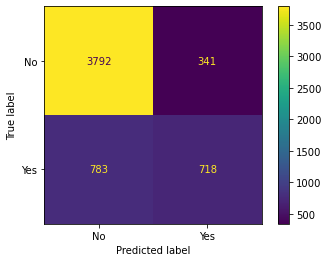

Confusion matrix for the test set
-----------------


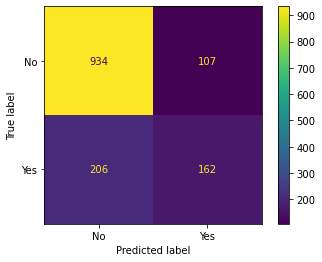

In [31]:
output_reduced = classification(x_train, y_train, x_test, y_test, DecisionTreeClassifier(max_depth=5), cv=10, pos_label="Yes", verbose=True, plot=True)

# Model Comparison

In [32]:
model_comparison([LogisticRegression(), DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=100)], classification
                 , model_index=None, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, cv=10, pos_label="Yes", verbose=False, plot=False)

LogisticRegression           DecisionTreeClassifier  \
                                   train      test                  train   
error_metric                                                                
val_mean_score (k=10)           0.787362         -               0.791085   
val_std (k=10)                  0.015036         -               0.013826   
accuracy                        0.786120  0.775727               0.800497   
precision                       0.638577       0.6               0.677998   
recall                          0.454364  0.423913               0.478348   

                                RandomForestClassifier            
                           test                  train      test  
error_metric                                                      
val_mean_score (k=10)         -               0.792862         -  
val_std (k=10)                -               0.009787         -  
accuracy               0.777857               0.801384  0.781405  
precision               0.60223               0.691383  0.620968  
recall                 0.440217               0.459694  0.418478

# Managing Imbalance in the data

In [33]:
churnData_reduced = pd.concat([x, y], axis=1)

In [34]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [35]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [36]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [37]:
churnData_reduced_yes = churnData_reduced[churnData_reduced["Churn"] == "Yes"]
churnData_reduced_no = churnData_reduced[churnData_reduced["Churn"] == "No"]

## Simple Downsampling

In [61]:
churnData_reduced_no_downsampled = churnData_reduced_no.sample(churnData_reduced_yes.shape[0])

In [62]:
churnData_reduced_balanced_ds = (pd.concat([churnData_reduced_yes, churnData_reduced_no_downsampled], axis=0)
                                  .sample(frac=1)
                                  .reset_index(drop=True)
                                )
churnData_reduced_balanced_ds

,tenure,MonthlyCharges,TotalCharges,Churn
0,12,94.55,1173.55,No
1,15,19.75,297.30,Yes
2,24,80.25,1861.50,Yes
3,35,61.20,2021.20,No
4,1,78.05,78.05,Yes
...,...,...,...,...
3733,2,75.90,143.35,Yes
3734,1,46.20,46.20,Yes
3735,26,20.05,505.90,No
3736,2,70.70,141.45,Yes


In [63]:
churnData_reduced_balanced_ds["Churn"].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [64]:
x = churnData_reduced_balanced_ds[["tenure", "MonthlyCharges", "TotalCharges"]]
y = churnData_reduced_balanced_ds["Churn"]

In [65]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [66]:
x_ds_train = pd.concat([train[0], train[1]], axis=1)
y_ds_train = train[3]
x_ds_test = pd.concat([test[0], test[1]], axis=1)
y_ds_test = test[3]

In [67]:
model_comparison([LogisticRegression(), DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=100)], classification
                 , model_index=None, x_train=x_ds_train, y_train=y_ds_train, x_test=x_ds_test, y_test=y_ds_test, cv=10, pos_label="Yes", verbose=False, plot=False)

LogisticRegression           DecisionTreeClassifier  \
                                   train      test                  train   
error_metric                                                                
val_mean_score (k=10)           0.728094         -               0.725753   
val_std (k=10)                  0.030287         -               0.027741   
accuracy                        0.728094  0.735294               0.755853   
precision                       0.703088  0.714286               0.727867   
recall                          0.790915   0.77957               0.818303   

                                RandomForestClassifier            
                           test                  train      test  
error_metric                                                      
val_mean_score (k=10)         -               0.731438         -  
val_std (k=10)                -               0.030250         -  
accuracy               0.752674               0.754849  0.745989  
precision               0.72973               0.732643  0.719807  
recall                 0.798387               0.803607  0.801075

## Simple Upsampling

In [68]:
churnData_reduced_yes_upsampled = churnData_reduced_yes.sample(churnData_reduced_no.shape[0], random_state=0, replace=True)

In [69]:
churnData_reduced_balanced_us = (pd.concat([churnData_reduced_no, churnData_reduced_yes_upsampled], axis=0)
                                  .sample(frac=1)
                                  .reset_index(drop=True)
                                )
churnData_reduced_balanced_us

,tenure,MonthlyCharges,TotalCharges,Churn
0,20,73.65,1463.50,Yes
1,64,66.15,4392.50,No
2,43,108.15,4600.70,Yes
3,1,50.55,50.55,Yes
4,50,79.60,4024.20,No
...,...,...,...,...
10343,40,101.30,4113.10,Yes
10344,1,50.15,50.15,Yes
10345,5,20.35,92.75,No
10346,4,81.00,340.85,Yes


In [70]:
churnData_reduced_balanced_us["Churn"].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [71]:
x = churnData_reduced_balanced_us[["tenure", "MonthlyCharges", "TotalCharges"]]
y = churnData_reduced_balanced_us["Churn"]

In [72]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [73]:
x_us_train = pd.concat([train[0], train[1]], axis=1)
y_us_train = train[3]
x_us_test = pd.concat([test[0], test[1]], axis=1)
y_us_test = test[3]

In [74]:
model_comparison([LogisticRegression(), DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=100)], classification
                 , model_index=None, x_train=x_us_train, y_train=y_us_train, x_test=x_us_test, y_test=y_us_test, cv=10, pos_label="Yes", verbose=False, plot=False)

LogisticRegression           DecisionTreeClassifier  \
                                   train      test                  train   
error_metric                                                                
val_mean_score (k=10)           0.728314         -               0.746311   
val_std (k=10)                  0.014382         -               0.018058   
accuracy                        0.726262  0.733333               0.754288   
precision                       0.722169  0.740157               0.729158   
recall                          0.734398  0.723077               0.808176   

                                RandomForestClassifier            
                           test                  train      test  
error_metric                                                      
val_mean_score (k=10)         -               0.749693         -  
val_std (k=10)                -               0.017072         -  
accuracy               0.737681               0.759604  0.750725  
precision              0.715525               0.742424  0.736462  
recall                 0.793269               0.794146  0.784615

## Upsampling using SMOTE

In [83]:
x = churnData[["tenure", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [84]:
smote = SMOTE()

In [85]:
x_smote, y_smote = smote.fit_resample(x, y)

In [88]:
x_smote

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,29.850000
1,34,56.950000,1889.500000
2,2,53.850000,108.150000
3,45,42.300000,1840.750000
4,2,70.700000,151.650000
...,...,...,...
10343,48,100.792928,4872.678763
10344,5,98.234936,461.554757
10345,27,101.244766,2754.440950
10346,38,62.176426,2354.569328


In [89]:
y_smote

0         No
1         No
2        Yes
3         No
4        Yes
        ... 
10343    Yes
10344    Yes
10345    Yes
10346    Yes
10347    Yes
Name: Churn, Length: 10348, dtype: category
Categories (2, object): ['No', 'Yes']

In [90]:
transformed = my_transformations(x_smote, y_smote, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [91]:
x_sm_train = pd.concat([train[0], train[1]], axis=1)
y_sm_train = train[3]
x_sm_test = pd.concat([test[0], test[1]], axis=1)
y_sm_test = test[3]

In [92]:
model_comparison([LogisticRegression(), DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=100)], classification
                 , model_index=None, x_train=x_sm_train, y_train=y_sm_train, x_test=x_sm_test, y_test=y_sm_test, cv=10, pos_label="Yes", verbose=False, plot=False)

LogisticRegression           DecisionTreeClassifier  \
                                   train      test                  train   
error_metric                                                                
val_mean_score (k=10)           0.732544         -               0.748126   
val_std (k=10)                  0.014921         -               0.020997   
accuracy                        0.733752  0.729469               0.757309   
precision                       0.709154  0.703672               0.735816   
recall                          0.792120    0.7946               0.802514   

                                RandomForestClassifier            
                           test                  train      test  
error_metric                                                      
val_mean_score (k=10)         -               0.749697         -  
val_std (k=10)                -               0.018048         -  
accuracy                0.73913               0.756705  0.743478  
precision              0.714409               0.751600  0.738679  
recall                 0.798457               0.766497  0.755063

# Grid Search - Random Forest 

## Random Forest Baseline

-----------------
The model score using K-fold cross validation (k=10) is 0.797 with a standard deviation of 0.007
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=10),0.797476,-
val_std (k=10),0.007119,-
accuracy,0.803159,0.784244
precision,0.694831,0.626984
recall,0.465690,0.429348


-----------------
Confusion matrix for the train set
-----------------


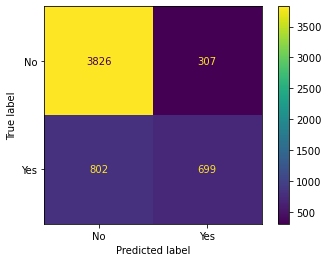

Confusion matrix for the test set
-----------------


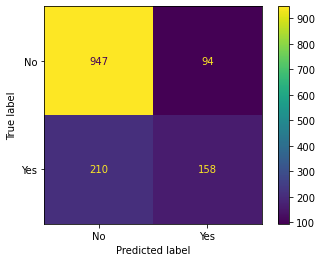

In [93]:
output_forest = classification(x_allvars_train, y_allvars_train, x_allvars_test, y_allvars_test, RandomForestClassifier(max_depth=5, n_estimators=100), cv=10, pos_label="Yes", verbose=True, plot=True)

In [94]:

param_grid = {
    'max_depth': [3 ,4 , 5 , 6, 7, 8],
    'n_estimators': [50, 75, 100, 125, 150],
    'min_samples_leaf' : [50, 75, 100, 125, 150],
    }

clf = RandomForestClassifier(random_state=0)

In [95]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [96]:
grid_search.fit(x_ds_train, y_ds_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [50, 75, 100, 125, 150],
                         'n_estimators': [50, 75, 100, 125, 150]},
             return_train_score=True)

In [97]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 50, 'n_estimators': 50}

-----------------
The model score using K-fold cross validation (k=10) is 0.798 with a standard deviation of 0.01
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=10),0.797652,-
val_std (k=10),0.010145,-
accuracy,0.801207,0.777147
precision,0.695786,0.6125
recall,0.451033,0.399457


-----------------
Confusion matrix for the train set
-----------------


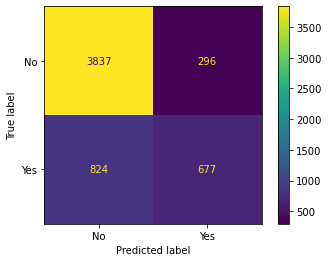

Confusion matrix for the test set
-----------------


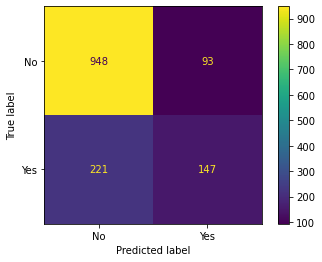

In [98]:
output_forest = classification(x_allvars_train, y_allvars_train, x_allvars_test, y_allvars_test, RandomForestClassifier(max_depth=7, n_estimators=50, min_samples_leaf=100), cv=10, pos_label="Yes", verbose=True, plot=True)